In [1]:
from typing import Any, Optional, Tuple
class Queue:

    def __init__(self, size: int) -> None:
        self.queue: List[Any] = []
        self.size = 1000

    def __repr__(self) -> str:
        return str(self.queue)

    def add(self, elem: Any) -> None:
        if len(self.queue) >= self.size:
            raise ValueError('The Queue is full')

        self.queue.append(elem)

    def remove(self) -> Any:
        if not self.queue:
            raise ValueError('The Queue is empty')

        return self.queue.pop(0)

    def is_empty(self) -> bool:
        return len(self.queue) == 0

In [14]:
from numpy import float64
from typing import Any, Optional, Tuple
import graphviz
from PIL import Image
class Node:

    def __init__(self, data:'Propertie' ) -> None:
        self.data = data
        self.left: Optional["Node"] = None
        self.right: Optional["Node"] = None
        self.level = None

    def __repr__(self) -> str:
        left = self.left.data if self.left is not None else None
        right = self.right.data if self.right is not None else None
        return f'{self.data} {left} {right}'


class Arbol_AVL:

    def __init__(self) -> None:
        self.root: Optional["Node"] = None

    def put_levels(self,nodo:'Propertie'):
        nivel = 0
        p, pad = self.root, None
        while p is not None:
            nivel +=1
            if nodo.metric == p.data.metric:
                if(nodo.metric2 == p.data.metric2):
                    p.level = nivel
                    return True
                elif nodo.metric2 < p.data.metric2:
                    p = p.left
                else:
                    p = p.right
            else:
                if nodo.metric < p.data.metric:
                    p = p.left
                else:
                    p = p.right
        return False


    def search(self, elem: 'Propertie') -> Tuple[Optional["Node"], Optional["Node"]]:
        p, pad = self.root, None
        while p is not None:
            if elem.metric == p.data.metric:
                return p, pad
            else:
                pad = p
                if elem.metric < p.data.metric:
                    p = p.left
                else:
                    p = p.right

        return p, pad

    def __search_dupli(self, elem: 'Propertie',node:'Node'= None) -> Tuple[Optional["Node"], Optional["Node"]]:
        if(node is None):
            node = self.root
        nivel = node.level
        p, pad = node, None
        while p is not None:
            pad = p
            if elem.metric == p.data.metric:
                if(elem.metric2 > p.data.metric2):
                    p = p.right
                    bol = True
                else:
                    p = p.left
                    bol = False

            else:

                if elem.metric < p.data.metric:
                    p = p.left
                    bol = False
                else:
                    p = p.right
                    bol = True

        return bol, pad

    def search_metric(self, elem: float64) -> Tuple[Optional["Node"], Optional["Node"]]:
        p, aux = self.root, None
        while p is not None:
            if elem == p.data.metric:
                aux = p
                p= None
                #return p
            else:
                pad = p
                if elem < p.data.metric:
                    p = p.left
                else:
                    p = p.right

        self.search_all(aux.data)

    def search_all(self,elem:'Propertie'):
        p,pad = self.search(elem)
        pad,abue = self.search(pad.data)
        if(abue.left == pad ):
            tio = abue.right
        else:
            tio = abue.left
        factor_b = self.balance_factor(p)
        print("El nodo es ",p )
        print(" el nivel es ",p.level)
        print(" Balenceo es ", factor_b)
        print(" el padre es ",pad)
        print( " el tio es ",tio)
        print(" y el abuelo es ",abue)
        return p,p.level,factor_b,pad,abue,tio

    def insert(self, elem: 'Propertie') -> bool:
        to_insert = Node(elem)
        if self.root is None:
            self.root = to_insert
            return True
        else:
            bol, pad = self.__search_dupli(elem,self.root)
            if(bol):
                pad.right = to_insert
            else:
                pad.left = to_insert
            self.desbalance()

            """if p is None:
                if elem.metric < pad.data.metric:
                    pad.left = to_insert
                else:
                    pad.right = to_insert
                self.desbalance()
            else:
                print("metric ",elem.metric)
                print("Se repitio ",elem.metric2," contra ",p.data.metric2)
                if elem.metric2 < p.data.metric2:
                    if(p.left is None):
                        p.left = to_insert
                    else:
                        p, pad = self.__search_dupli(elem,p.left)



                    print("men")
                elif elem.metric2 > p.data.metric2:
                    if(p.right is None):
                        p.right = to_insert
                    else:
                        p, pad = self.__search_dupli(elem)



                    print('may')
                else:
                    print("Se repitio la segunda ")"""

            return False


    def delete(self, elem: Any, mode: bool = True) -> bool:
        if (isinstance(elem,Propertie)):
            elem = elem.metric
        if(elem is Propertie ):
            elem = elem.metric
        p, pad = self.search(elem)
        if p is not None:
            if p.left is None and p.right is None:
                if p == pad.left:
                    pad.left = None
                else:
                    pad.right = None
                del p
            elif p.left is None and p.right is not None:
                if p == pad.left:
                    pad.left = p.right
                else:
                    pad.right = p.right
                del p
            elif p.left is not None and p.right is None:
                if p == pad.left:
                    pad.left = p.left
                else:
                    pad.right = p.left
                del p
            else:
                if mode:
                    pred, pad_pred = self.__pred(p)
                    p.data.metric = pred.data.metric
                    if pred.left is not None:
                        if(pad_pred==p):
                           p.left = pred.left
                        else:
                            pad_pred.right = pred.left
                    else:
                        pad_pred.right = None
                    del pred
                else:
                    sus, pad_sus = self.__sus(p)
                    p.data.metric = sus.data.metric
                    if sus.right is not None:
                        pad_sus.left = sus.right
                    else:
                        pad_sus.left = None
                    del sus

        self.desbalance()



    def __pred(self, node: "Node") -> Tuple["Node", "Node"]:
        p, pad = node.left, node
        while p.right is not None:
            p, pad = p.right, p

        return p, pad

    def __sus(self, node: "Node") -> Tuple["Node", "Node"]:
        p, pad = node.right, node
        while p.left is not None:
            p, pad = p.left, p

        return p, pad

    def preorder(self,node: Optional["Node"]) -> None:
        if node is not None:
            print(node.data, end=' ')
            self.preorder(node.left)
            self.preorder(node.right)

    def __inorder(self, node: Optional["Node"]) -> None:
        if node is not None:
            self.__inorder(node.left)
            print(node)
            self.__inorder(node.right)

    def inorder(self) -> None:
        self.__inorder(self.root)


    def generate_dummy_tree_1(self) -> "AVL":
        aux = [20,30,40,35,15,50,55,56,57,58]
        for elem in aux:
            self.insert(elem)


    def tree_height(self, Node_I) -> int:
        if (isinstance(Node,int)):
            Node_I = self.search(Node_I)[0]
        if (isinstance(Node_I,Propertie)):
            Node_I = self.search(Node_I)[0]
        if Node_I is None:
            return -1
        max_height = -1
        level = 0
        queue = [(Node_I, level)]
        while queue:
            node, current_level = queue.pop(0)
            if node is not None:
                max_height = max(max_height, current_level)
                queue.append((node.left, current_level + 1))
                queue.append((node.right, current_level + 1))
        return max_height

    def balance_factor(self, node: "Node") -> int:
        if (isinstance(node,int)):
            node = self.search(node)[0]
        if (isinstance(node,Propertie)):
            node = self.search(node)[0]
        left_height = self.tree_height(node.left)
        right_height = self.tree_height(node.right)
        return right_height-left_height

    def levels_nr_print(self, node: "Node"= None) -> None:
        if(node is None):
            node = self.root
        p, q = node, Queue(50)
        nodos = []
        q.add(p)
        while not q.is_empty():
            p = q.remove()
            nodos.append(p.data)
            print(p.data,p.level , end=' ')
            if p.left is not None:
                q.add(p.left)
            if p.right is not None:
                q.add(p.right)

        #print("cant ",len(nodos))

    def levels_nr(self, node: "Node") -> None:
        p, q = node, Queue(50)
        nodos = []
        q.add(p)
        while not q.is_empty():
            p = q.remove()
            nodos.append(p.data)

            if p.left is not None:
                q.add(p.left)

            if p.right is not None:
                q.add(p.right)

        return nodos

    def desbalance(self) -> 'Node':
        dic = {}
        aux = []
        nodos: 'Node'= self.levels_nr(self.root)
        for elem in nodos:
            dic[elem]= self.balance_factor(elem)
            self.put_levels(elem)
            if(dic[elem] > 1 or dic[elem] < -1 ):
                aux.append(elem)
        if(len(aux)>0):
            #print("Aux",aux, " Valor ",dic[aux[-1]])
            self.balanceo(aux[-1],dic[aux[-1]])


    def balanceo(self,node,equi):
        if (isinstance(node,int)):
            node = self.search(node)[0]
        if (isinstance(node,Propertie)):
            node = self.search(node)[0]

        if(equi>1):
            if(self.balance_factor(node.right)>=0):
                #print("Rotacion Simple Izquierda: en el nodo",node.data)
                node = self.rotacion_Sim_Iz(node)
            else:
                #print("Rotacion Doble Derecha-Izquierda: en el nodo",node.data)
                aux= node
                node = self.rotacion_Sim_De(node.right)
                node = self.rotacion_Sim_Iz(aux)

        else:
            if(self.balance_factor(node.left)<=0):
                #print("Rotacion Simple Derecha: en el nodo",node.data)
                node = self.rotacion_Sim_De(node)
            else:
                #print("Rotacion Doble Izquierda-Derecha: en el nodo",node.data)
                aux = node
                node = self.rotacion_Sim_Iz(node.left)
                node = self.rotacion_Sim_De(aux)


  #si es 2 rotacion a la izquierda, -2 rotacion a la derecha
  # signos iguales rotacion simple, signos contrarios rotacion doble

    def rotacion_Sim_Iz(self,nodo:'Node'):
        if (isinstance(nodo,int)):
            nodo = self.search(nodo)[0]
        if (isinstance(nodo,Propertie)):
            nodo = self.search(nodo)[0]
        padre = self.search(nodo.data)[1]
        aux= nodo.right
        nodo.right= aux.left
        aux.left=nodo
        if(self.root.data == nodo.data):
            self.root = aux
        else:
            if(padre.data.metric > nodo.data.metric):
                padre.left= aux
            else:
                padre.right = aux
        return aux

    def rotacion_Sim_De(self,nodo:'Node'):
        if (isinstance(nodo,int)):
            nodo = self.search(nodo)[0]
        if (isinstance(nodo,Propertie)):
            nodo = self.search(nodo)[0]
        padre = self.search(nodo.data)[1]
        aux= nodo.left
        nodo.left= aux.right
        aux.right=nodo
        if(self.root.data == nodo.data):
            self.root = aux
        else:
            if(padre.data.metric >nodo.data.metric):
                padre.left= aux
            else:
                padre.right = aux
        return aux

    def graficar_arbol(self,nodo= None):
        if (nodo is None):
            nodo = self.root
        grafo = self.__graficar_arbol(nodo)
        grafo.render('arbol_Properties')
        return grafo


    def __graficar_arbol(self,nodo:"Node", grafo=None):
        if grafo is None:
            grafo = graphviz.Digraph(format='png')

        if nodo is not None:
            etiqueta = f"{nodo.data.metric2}\n{str(nodo.data.city)}\nLatitude: {str(nodo.data.latitude)}\nLongitude: {str(nodo.data.longitude)}\n"
            etiqueta+= f"Precio: {str(nodo.data.price)}\nSurface Total: {str(nodo.data.surface_total)}\nel factor de balanceo es : {self.balance_factor(nodo)}"
            grafo.node(str(nodo.data.metric2),label= etiqueta)

            if nodo.left is not None:
                grafo.edge(str(nodo.data.metric2), str(nodo.left.data.metric2))
                self.__graficar_arbol(nodo.left, grafo)

            if nodo.right is not None:
                grafo.edge(str(nodo.data.metric2), str(nodo.right.data.metric2))
                self.__graficar_arbol(nodo.right, grafo)

        return grafo

    def Niveles_recursivo(self):
        resultado = []
        arbol = self.root
        self.recorrer_niveles([arbol],resultado)
        return resultado

    def recorrer_niveles(self,nodos,resultado):
        if not nodos:
            return
        siguiente_nivel = []
        nivel_actual = []
        for nodo in nodos:
            nivel_actual.append(nodo.data.metric2)
            if nodo.left:
                siguiente_nivel.append(nodo.left)
            if nodo.right:
                siguiente_nivel.append(nodo.right)
        resultado.extend(nivel_actual)
        self.recorrer_niveles(siguiente_nivel,resultado)

    def __Buscar_criterios(self,filtro,condi:list,nodo:list['Propertie']):
        aux = []
        if(filtro < 7):
            if(filtro < 4):
                if(filtro == 1):
                    if(condi[1] == "="):
                        for elem in nodo:
                            if(elem.title == condi[0]):
                                aux.append(nodo)
                    elif(condi[1] == "!="):
                        for elem in nodo:
                            if(elem.title != condi[0]):
                                aux.append(nodo)

                elif(filtro == 2):
                    if(condi[1] == "="):
                        for elem in nodo:
                            if(elem.department == condi[0]):
                                aux.append(nodo)
                    elif(condi[1] == "!="):
                        for elem in nodo:
                            if(elem.department != condi[0]):
                                aux.append(nodo)


                elif(filtro == 3):
                    if(condi[1] == "="):
                        for elem in nodo:
                            if(elem.city == condi[0]):
                                aux.append(nodo)
                    elif(condi[1] == "!="):
                        for elem in nodo:
                            if(elem.city != condi[0]):
                                aux.append(nodo)

            else:
                if(filtro == 4):
                    if(condi[1] == "="):
                        for elem in nodo:
                            if(elem.property_type == condi[0]):
                                aux.append(nodo)
                    elif(condi[1] == "!="):
                        for elem in nodo:
                            if(elem.property_type != condi[0]):
                                aux.append(nodo)

                elif(filtro == 5):
                    if(condi[1] == "="):
                        for elem in nodo:
                            if(elem.latitude == condi[0]):
                                aux.append(nodo)
                    elif(condi[1] == "!="):
                        for elem in nodo:
                            if(elem.latitude != condi[0]):
                                aux.append(nodo)
                    elif(condi[1] == ">"):
                        for elem in nodo:
                            if(elem.latitude > condi[0]):
                                aux.append(nodo)
                    elif(condi[1] == "<"):
                        for elem in nodo:
                            if(elem.latitude < condi[0]):
                                aux.append(nodo)
                    elif(condi[1] == ">="):
                        for elem in nodo:
                            if(elem.latitude >= condi[0]):
                                aux.append(nodo)
                    elif(condi[1] == "<="):
                        for elem in nodo:
                            if(elem.latitude <= condi[0]):
                                aux.append(nodo)

                elif(filtro == 6):
                    if(condi[1] == "="):
                        for elem in nodo:
                            if(elem.longitude == condi[0]):
                                aux.append(nodo)
                    elif(condi[1] == "!="):
                        for elem in nodo:
                            if(elem.longitude != condi[0]):
                                aux.append(nodo)
                    elif(condi[1] == ">"):
                        for elem in nodo:
                            if(elem.longitude > condi[0]):
                                aux.append(nodo)
                    elif(condi[1] == "<"):
                        for elem in nodo:
                            if(elem.longitude < condi[0]):
                                aux.append(nodo)
                    elif(condi[1] == ">="):
                        for elem in nodo:
                            if(elem.longitude >= condi[0]):
                                aux.append(nodo)
                    elif(condi[1] == "<="):
                        for elem in nodo:
                            if(elem.longitude <= condi[0]):
                                aux.append(nodo)

        else:
            if(filtro < 10):
                if(filtro == 7):
                    if(condi[1] == "="):
                        for elem in nodo:
                            if(elem.surface_total == condi[0]):
                                aux.append(nodo)
                    elif(condi[1] == "!="):
                        for elem in nodo:
                            if(elem.surface_total != condi[0]):
                                aux.append(nodo)
                    elif(condi[1] == ">"):
                        for elem in nodo:
                            if(elem.surface_total > condi[0]):
                                aux.append(nodo)
                    elif(condi[1] == "<"):
                        for elem in nodo:
                            if(elem.surface_total < condi[0]):
                                aux.append(nodo)
                    elif(condi[1] == ">="):
                        for elem in nodo:
                            if(elem.surface_total >= condi[0]):
                                aux.append(nodo)
                    elif(condi[1] == "<="):
                        for elem in nodo:
                            if(elem.surface_total <= condi[0]):
                                aux.append(nodo)

                elif(filtro == 8):
                    if(condi[1] == "="):
                        for elem in nodo:
                            if(elem.surface_covered == condi[0]):
                                aux.append(nodo)
                    elif(condi[1] == "!="):
                        for elem in nodo:
                            if(elem.surface_covered != condi[0]):
                                aux.append(nodo)
                    elif(condi[1] == ">"):
                        for elem in nodo:
                            if(elem.surface_covered > condi[0]):
                                aux.append(nodo)
                    elif(condi[1] == "<"):
                        for elem in nodo:
                            if(elem.surface_covered < condi[0]):
                                aux.append(nodo)
                    elif(condi[1] == ">="):
                        for elem in nodo:
                            if(elem.surface_covered >= condi[0]):
                                aux.append(nodo)
                    elif(condi[1] == "<="):
                        for elem in nodo:
                            if(elem.surface_covered <= condi[0]):
                                aux.append(nodo)


                elif(filtro == 9):
                    if(condi[1] == "="):
                        for elem in nodo:
                            if(elem.bedrooms == condi[0]):
                                aux.append(nodo)
                    elif(condi[1] == "!="):
                        for elem in nodo:
                            if(elem.bedrooms != condi[0]):
                                aux.append(nodo)
                    elif(condi[1] == ">"):
                        for elem in nodo:
                            if(elem.bedrooms > condi[0]):
                                aux.append(nodo)
                    elif(condi[1] == "<"):
                        for elem in nodo:
                            if(elem.bedrooms < condi[0]):
                                aux.append(nodo)
                    elif(condi[1] == ">="):
                        for elem in nodo:
                            if(elem.bedrooms >= condi[0]):
                                aux.append(nodo)
                    elif(condi[1] == "<="):
                        for elem in nodo:
                            if(elem.bedrooms <= condi[0]):
                                aux.append(nodo)


            else:
                if(filtro == 10):
                    if(condi[1] == "="):
                        for elem in nodo:
                            if(elem.bathrooms == condi[0]):
                                aux.append(nodo)
                    elif(condi[1] == "!="):
                        for elem in nodo:
                            if(elem.bathrooms != condi[0]):
                                aux.append(nodo)
                    elif(condi[1] == ">"):
                        for elem in nodo:
                            if(elem.bathrooms > condi[0]):
                                aux.append(nodo)
                    elif(condi[1] == "<"):
                        for elem in nodo:
                            if(elem.bathrooms < condi[0]):
                                aux.append(nodo)
                    elif(condi[1] == ">="):
                        for elem in nodo:
                            if(elem.bathrooms >= condi[0]):
                                aux.append(nodo)
                    elif(condi[1] == "<="):
                        for elem in nodo:
                            if(elem.bathrooms <= condi[0]):
                                aux.append(nodo)


                elif(filtro == 11):
                    if(condi[1] == "="):
                        for elem in nodo:
                            if(elem.operation_type == condi[0]):
                                aux.append(nodo)
                    elif(condi[1] == "!="):
                        for elem in nodo:
                            if(elem.operation_type != condi[0]):
                                aux.append(nodo)


                elif(filtro == 12):
                    if(condi[1] == "="):
                        for elem in nodo:
                            if(elem.price == condi[0]):
                                aux.append(nodo)
                    elif(condi[1] == "!="):
                        for elem in nodo:
                            if(elem.price != condi[0]):
                                aux.append(nodo)
                    elif(condi[1] == ">"):
                        for elem in nodo:
                            if(elem.price > condi[0]):
                                aux.append(nodo)
                    elif(condi[1] == "<"):
                        for elem in nodo:
                            if(elem.price < condi[0]):
                                aux.append(nodo)
                    elif(condi[1] == ">="):
                        for elem in nodo:
                            if(elem.price >= condi[0]):
                                aux.append(nodo)
                    elif(condi[1] == "<="):
                        for elem in nodo:
                            if(elem.price <= condi[0]):
                                aux.append(nodo)
        return aux




    def Buscar_criterios(self,condi1:list,filtro1,condi2:list=None,filtro2=None,condi3:list=None,filtro3=None):
        auxi = []
        if(condi1 is not None):
            auxi = self.__Buscar_criterios(filtro1,condi1,self.levels_nr(self.root))
        if(condi2 is not None):
           auxi = self.__Buscar_criterios(filtro2,condi2,auxi)
        if(condi3 is not None):
            auxi = self.__Buscar_criterios(filtro3,condi3,auxi)
        return auxi




In [12]:
class Propertie:

    def __init__(self,title:'str' ,department:'str' ,city:'str' ,property_type:'str' ,latitude:'float' ,longitude:'float' ,surface_total:'float' ,
                 surface_covered:'float' ,bedrooms:'int' ,bathrooms:'int' ,operation_type:'str' ,price:'float'  ) -> None:
        self.title = title
        self.department = department
        self.city = city
        self.property_type = property_type
        self.latitude = latitude
        self.longitude = longitude
        self.surface_total = surface_total
        self.surface_covered = surface_covered
        self.bedrooms = bedrooms
        self.bathrooms = bathrooms
        self.operation_type = operation_type
        self.price = price
        self.metric = self.price/ self.surface_total
        self.metric2 = self.title.split("Cod. ")[1]

    def __str__(self) -> str:
        return f"{self.title.split('Cod. ')[1]} {self.metric}"
        return f"{self.title} {self.department} {self.city} {self.property_type} {self.latitude} {self.longitude} {self.surface_total} {self.surface_covered} {self.bedrooms} {self.bathrooms} {self.operation_type} {self.price} "


In [15]:
import pandas as pd
import IPython.display
from IPython.display import display, Image
df = pd.read_csv('co_properties_final.csv')
df['metric'] = df['price'].divide(df['surface_total'])
df
arbol = Arbol_AVL()
aux= []
for index, row in df.iterrows():
    aux.append(Propertie(row[0],row[1], row[2], row[3], row[4], row[5], row[6], row[7],row[8], row[9], row[10], row[11]))
    arbol.insert(aux[index])


arbol.search_metric(39600)
arbol.Buscar_criterios([4,">"],9,[15000,">="],12,[200,">"],7)

El nodo es  ADUR4751 39600.0 AARE64875 35002.32558139535 ACRS94447 41538.46153846154
 el nivel es  5
 Balenceo es  0
 el padre es  VAYH3595 45370.85744345081 ADUR4751 39600.0 VSBI11485 146198.8304093567
 el tio es  AFNC-100629 24390.243902439026 ADUR4406 19767.441860465115 VMUR2690 27239.150507848568
 y el abuelo es  ABKS1945 31428.571428571428 AFNC-100629 24390.243902439026 VAYH3595 45370.85744345081


AttributeError: ignored

In [5]:
lista = arbol.Niveles_recursivo()
print(len(lista))
arbol.levels_nr_print()
print("")
print(lista)

150
VREI18080 1187371.3109128345 1 AREI-16605 18853.69532428356 2 VARE83401 3571428.5714285714 2 AINH2992 13793.103448275862 3 ABKS1945 31428.571428571428 3 VRAZ380 2368421.052631579 3 VINP22297 4753519.736842105 3 AJMI5787 10285.714285714286 4 AGRJ691 15625.0 4 AFNC-100629 24390.243902439026 4 VAYH3595 45370.85744345081 4 VSUM461941 2155172.4137931033 4 VKWC11908020 2890625.0 4 VMIS1048039 3865979.381443299 4 VCYC10418 6388888.888888889 4 ACLV-6242 8163.265306122449 5 ABNC94157 12359.550561797752 5 AADC41792 14545.454545454546 5 AADN758870 17142.85714285714 5 ADUR4406 19767.441860465115 5 VMUR2690 27239.150507848568 5 ADUR4751 39600.0 5 VSBI11485 146198.8304093567 5 VKAS3000 1741293.5323383084 5 VSBI10533 2166666.6666666665 5 V341-2187 2578947.3684210526 5 VVVN2354 3243243.243243243 5 VMAT12129 3833333.3333333335 5 VITEK3320 4263565.891472869 5 VGCS-714501960 5147058.823529412 5 VBKS2721 8080808.080808081 5 AJMI6360 1750.0 6 AODH878 9821.42857142857 6 ASUM461996 11538.461538461539 6 A

In [6]:
columns = df.columns.tolist()
for i,colum in enumerate(columns):
    if(i<9):
        print(f'{i+1}.  {colum}')
    else:
        print(f'{i+1}. {colum}')


1.  title
2.  department
3.  city
4.  property_type
5.  latitude
6.  longitude
7.  surface_total
8.  surface_covered
9.  bedrooms
10. bathrooms
11. operation_type
12. price
13. metric


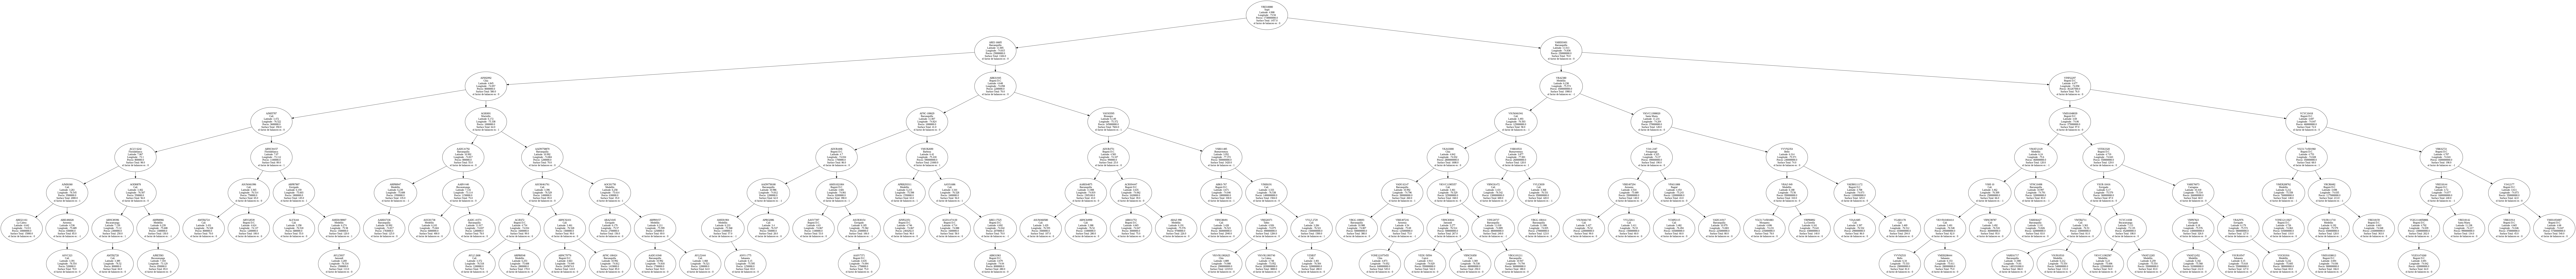

In [7]:
arbol.graficar_arbol()
dot = arbol.graficar_arbol()
image = Image(data=dot.pipe(format='png'))
display(image)

In [8]:
df['surface_total'].value_counts()
df['surface_covered'].value_counts()
df['metric'].value_counts()


2.500000e+06    2
3.855422e+06    2
2.166667e+06    2
1.000000e+04    2
1.647059e+04    2
               ..
3.597561e+06    1
1.500000e+06    1
3.071429e+06    1
2.578947e+06    1
1.541284e+06    1
Name: metric, Length: 143, dtype: int64

In [9]:
df1 = df[df['metric'] == 3.855422e+06 ]
df.describe()
df.dtypes

title               object
department          object
city                object
property_type       object
latitude           float64
longitude          float64
surface_total      float64
surface_covered    float64
bedrooms           float64
bathrooms          float64
operation_type      object
price              float64
metric             float64
dtype: object